In [1]:
%load_ext autoreload
%autoreload 2

### 2. Test the Foward part of the Network
> * Now make sure that we can map from an image into an SxSx2x11 Tensor
> * First make sure that the Yolo2 weights are loadable and make sense.

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from Model.vis_utils import visualize_grid

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# l2 = np.array(list((yolo_weights['model_weights']['conv2d_1']['conv2d_1'][u'kernel:0'])))
# grid = visualize_grid(l2.transpose(3, 1, 2, 0))
# print (grid.shape, l2.shape)
# plt.imshow(grid.astype('uint8'))
# plt.axis('off')
# plt.gcf().set_size_inches(5, 5)
# plt.show()

#### 2.1 Overfit Localizer in Tiny Data
> * For debugging, we run the foward, and backward pass for `a few`
epochs.

In [4]:
import torch
print(torch.__version__)
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from Model.dataloader import NutritionDataset
from Model.net import LocalizerNet
from train import train_localizer, calculate_iou

0.4.0


In [5]:
def train_localizer_network():
    IMAGE_DIR = '../Data/FullData/RawImages/'
    BOXES = '../Data/FullData/BoundingBoxes.npy'
    DATA_PATH = '../Data/FullData/train_dev_test.npy'
    YOLO_PATH = '../Data/FullData/yolo.h5'
    debug = not torch.cuda.is_available()
    dataset = DataLoader(
        NutritionDataset(IMAGE_DIR, BOXES, DATA_PATH, debug=debug),
        batch_size=64, shuffle=True, num_workers=8,
    )
    dev = DataLoader(
        NutritionDataset(IMAGE_DIR, BOXES, DATA_PATH, split='dev', debug=debug),
        batch_size=64, shuffle=True, num_workers=8,
    )
    config = {
        'keep_prob' : 0.9995
    }
    model = LocalizerNet(YOLO_PATH, use_full_yolo=True, config_params=config)
    optimizer = torch.optim.Adam(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=2.5e-6, weight_decay=0.0005
    )
    scheduler = torch.optim.lr_scheduler.MultiStepLR(
        optimizer, [5, 10, 15, 20, 25, 30, 45, 50, 60, 75, 85, 95],
        gamma=0.995
    )
    r = train_localizer(
        model, optimizer, dataset, dev, epochs=100, 
        scheduler=None, restore=True
    )
    return r   

In [6]:
train_losses, dev_losses, train_map, dev_map = train_localizer_network()

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.09826385229825974
	 Dev Loss =  0.48883467501607436
	 Train mAP =  [0.28571429 0.14285714 0.14285714 0.07142857]
	 Dev mAP =  [0.14144255 0.10452189 0.08947521 0.08618043]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.07603289932012558
	 Dev Loss =  0.5381258119796885
	 Train mAP =  [0.30952381 0.30952381 0.07142857 0.07142857]
	 Dev mAP =  [0.16301342 0.11102772 0.09319153 0.08611814]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.048405129462480545
	 Dev Loss =  0.5272588534601803
	 Train mAP =  [0.6 0.2 0.1 0. ]
	 Dev mAP =  [0.1132526  0.07305008 0.07089491 0.0426382 ]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.06171875447034836
	 Dev Loss =  0.5044194326318544
	 Train mAP =  [0.33333333 0.16666667 0.         0.        ]
	 Dev mAP =  [0.12857143 0.04341133 0.00821018 0.00821018]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.03605290502309799
	 Dev Loss =  0.4826648235321045
	 Train mAP =  [0.5952381  0.36904762 0.07142857 0.        ]
	 Dev mAP =  [0.13678161 0.05862069 0.02931034 0.02643678]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.039361823350191116
	 Dev Loss =  0.4525045916951936
	 Train mAP =  [0.58333333 0.25       0.08333333 0.        ]
	 Dev mAP =  [0.12824302 0.07775041 0.02873563 0.02873563]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.02844838611781597
	 Dev Loss =  0.44256868033573543
	 Train mAP =  [0.80357143 0.67857143 0.21428571 0.07142857]
	 Dev mAP =  [0.15102627 0.09154351 0.0545977  0.03448276]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.026419684290885925
	 Dev Loss =  0.42751717053610705
	 Train mAP =  [0.5952381  0.35714286 0.07142857 0.        ]
	 Dev mAP =  [0.16929392 0.09683908 0.04195402 0.02988506]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.023068513721227646
	 Dev Loss =  0.42515515870061416
	 Train mAP =  [0.92857143 0.48809524 0.33333333 0.08333333]
	 Dev mAP =  [0.14856322 0.08764368 0.0545977  0.02155172]


HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))

HBox(children=(IntProgress(value=0, max=157), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.01418287307024002
	 Dev Loss =  0.4216845867962673
	 Train mAP =  [0.83333333 0.54166667 0.25       0.1875    ]
	 Dev mAP =  [0.14712644 0.08534483 0.02729885 0.01724138]


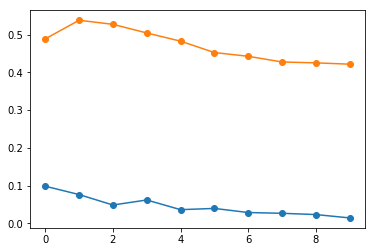

In [8]:
plt.plot(train_losses, '-o')
plt.plot(dev_losses, '-o')

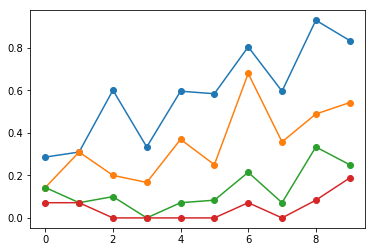

In [10]:
# plt.plot(dev_map, '-o')
plt.plot(train_map, '-o')
# plt.savefig('goals2.png')

In [ ]:
def calculate_mean_image():
    '''
    calculate the mean image on the training set at 
    different sizes, (270, 480) and (540, 960)
    '''
    IMAGE_DIR = '../Data/FullData/RawImages/'
    DATA_PATH = '../Data/FullData/train_dev_test.npy'
    image_paths = [os.path.join(IMAGE_DIR, f) for f in np.load(DATA_PATH).item()['train']]
    mean_270, mean_540 = np.zeros((480, 270, 3)), np.zeros((960, 540, 3))
    for img in tqdm(image_paths):
        mean_270 += resized_image((1080//4, 1920//4), img)
        mean_540 += resized_image((1080//2, 1920//2), img)
    N = len(image_paths)
    return mean_270 / N, mean_540 / N

def resized_image(size, path):
    with Image.open(path) as img:
        img = img.resize(size, resample=Image.BILINEAR)
        img = np.asarray(img)
    return img

In [ ]:
# # s, l = calculate_mean_image()
# mean_image_s, mean_image_l = (
#     Image.fromarray(s.astype('uint8'), 'RGB'), 
#     Image.fromarray(l.astype('uint8'), 'RGB')
# )